### POINTS 1+3)

In [5]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from pstats import Stats
from pstats import StatsProfile
import statsmodels.api as sm

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('autoscout24_clean.csv',
                 sep=',',
                 encoding='utf-8')

df ['price (euro)'] = df['price (euro)'].fillna(0)
df ['km'] = df['km'].fillna(0)

df


,beschreibung,alter,leistung,nutzung,schaltung,tank,co2,alles,verkaufer,ort,nation,price (euro),km,consumption (per 100km),brand,users
0,1.0 TSI DSG LIFE C.Play Shz LED ACC SOFORT,08/2022,81 kW (110 hp),Employee's car,Automatic,Gasoline,111 g/km (comb.),PreviousNext1 / 18Volkswagen Taigo 1.0 TSI DSG...,CC Automobile,Cihanay Cetin • DE-52349 Düren,deutschland,25980.0,2460.0,4.9,Volkswagen,1
1,Carrera 3.4 Cabrio mahagoni Bose PASM Memory,02/2015,257 kW (349 hp),Used,Automatic,Gasoline,218 g/km (comb.),PreviousNext1 / 27Porsche 991 Carrera 3.4 Cabr...,Paul Lüske GmbH,Team Verkauf • DE-49661 Cloppenburg,deutschland,89800.0,80496.0,9.2,Porsche,3
2,COUPE AVANTGARDE WIDESCREEN COMAND 360°KAM,05/2018,135 kW (184 hp),Used,Automatic,Gasoline,158 g/km (comb.),Mercedes-Benz E 200 COUPE AVANTGARDE WIDESCREE...,Genter Automobile,DE-13353 Berlin,deutschland,36999.0,82922.0,7,Mercedes-Benz,1
3,4M Night|Driver|Sportabgas|H&K|Pano,06/2019,280 kW (381 hp),Used,Automatic,Gasoline,193 g/km (comb.),Mercedes-Benz CLA 45 AMG 4M Night|Driver|Sport...,Gelder & Sorg GmbH & Co. KG,Ihr Verkaufsteam • DE-97437 Haßfurt,deutschland,44480.0,29900.0,8.5,Mercedes-Benz,1
4,Kasten/Kombi 2.5 CDTI L1H1 Westfalia Tisch Dre...,07/2010,107 kW (145 hp),Used,Manual,Diesel,232 g/km (comb.),Opel Vivaro Kasten/Kombi 2.5 CDTI L1H1 Westfal...,Autohaus Kropf GmbH,David Richter • DE-90431 Nürnberg,deutschland,16880.0,166000.0,8.8,Opel,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,1.6 T-GDi MHEV Drive,"Regensensor, Nebelscheinwerfer, Servolenkung, ...",112 kW (152 PS),Gebraucht,Schaltgetriebe,Benzin,- (g/km),"Kia Sportage 1.6 T-GDi MHEV DriveRegensensor, ...",AUTOS MOLIERE SEVILLA,Contáctanos en: • ES-41500 ALCALA DE GUADAIRA,spanien,26890.0,7826.0,NaN,Kia,0
2870,SEMIHIBRIDO 1.5 HEV 145KW 197 5P,11/2021,145 kW (197 PS),Tageszulassung,Automatik,Sonstige,- (g/km),Lynk & Co 01 SEMIHIBRIDO 1.5 HEV 145KW 197 5P€...,"VOLVO VYPSA, Concesionario oficial Volvo Córdoba",Contáctanos en: • ES-14014 CORDOBA,spanien,34900.0,3827.0,NaN,Lynk,0
2871,d,10/2017,- kW (- PS),Gebraucht,Schaltgetriebe,Diesel,- (g/km),"Mercedes-Benz C 180 d€ 20.500,-147.000 km10/20...",D-PAZZOS MOTOR JEREZ,Contáctanos en: • ES-11405 JEREZ DE LA FRONTERA,spanien,20500.0,147000.0,NaN,Mercedes-Benz,0
2872,730dA,"Regensensor, Alarmanlage, Klimaautomatik, Seit...",195 kW (265 PS),Gebraucht,Automatik,Diesel,- (g/km),"BMW 730 730dARegensensor, Alarmanlage, Klimaau...",IDEAL CAR,Contáctanos en: • ES-29620 TORREMOLINOS,spanien,32990.0,173000.0,"5,3",BMW,0


### 4) EDA Part

### 5) Regression

## Simple linear regression (only one explanatory variable in the model) KM ODER Price

In [7]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['km'], 
                                                    df['price (euro)'], 
                                                    test_size=0.5, 
                                                    random_state=30)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
2165         2.0
1754    236321.0
819       4350.0
840      68980.0
123     143488.0
Name: km, dtype: float64 

y_train:
2165        0.0
1754    17900.0
819     39820.0
840     76000.0
123     10990.0
Name: price (euro), dtype: float64


In [8]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            48926.51
Slope of regression line (beta):          -0.193
p-value:                                  0.0000
R-squared (coefficient of determination): 0.0472


### Plot regression line

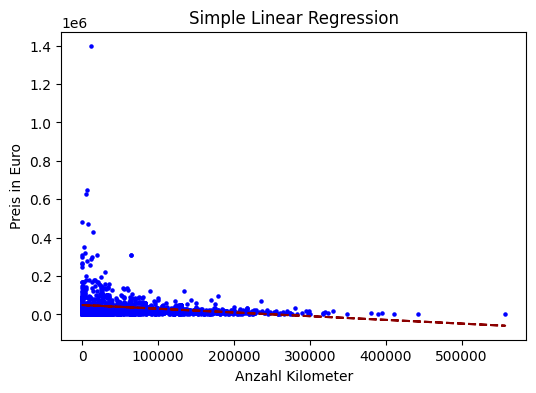

In [9]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept


# Apply myfunc() to x, i.e. make predictions
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, s=5, color='blue')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('Anzahl Kilometer')
plt.ylabel('Preis in Euro')

plt.show()


## Check model residuals (residuals = predicted values minus observed val

In [10]:
# Calculate residuals (here: predicted prices minus observed prices)
residuals = mymodel - y_train

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

1st Predicted price in dataset: 48926.12
1st Observed price in dataset: 25980.00
1st Residual price in dataset: 22946.12


### 6 & 7) Measures of fit and interpretation